In [1]:
import pandas as pd

pd.options.display.max_rows = 999

import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
import ast


In [6]:
try:
    df = pd.read_json("cleaned_dataset.json")
    print("Dataset loaded successfully.")
except FileNotFoundError:
    print(
        "Error: 'dataset.json' not found. Please download it and place it in the correct directory."
    )


Dataset loaded successfully.


# 5. Building a machine learning model

## Analysis of the dataset and the features

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Set plot style for better aesthetics
sns.set_style("whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)

# Let's assume your main DataFrame is `df`.
# For this analysis, you'll need your feature columns and the target column.
# If 'requester_received_pizza' is not in your current DataFrame, you should load the original
# data again and merge/join it.
# For demonstration, let's assume 'df' contains all necessary columns.

# Example:
# original_df = pd.read_json('random_acts_of_pizza.json')
# df['requester_received_pizza'] = original_df['requester_received_pizza']

# Define feature lists for convenience
user_activity_cols = [
    "requester_account_age_in_days_at_request",
    "requester_days_since_first_post_on_raop_at_request",
    "requester_number_of_comments_at_request",
    "requester_number_of_comments_in_raop_at_request",
    "requester_number_of_posts_at_request",
    "requester_number_of_posts_on_raop_at_request",
    "requester_number_of_subreddits_at_request",
    "requester_upvotes_minus_downvotes_at_request",
    "requester_upvotes_plus_downvotes_at_request",
    "raop_post_ratio",
]

request_content_cols = ["request_length"]
time_cols = ["hour_of_request", "day_of_week"]
target_col = "requester_received_pizza"


--- Analysis of User History & Activity Metrics ---


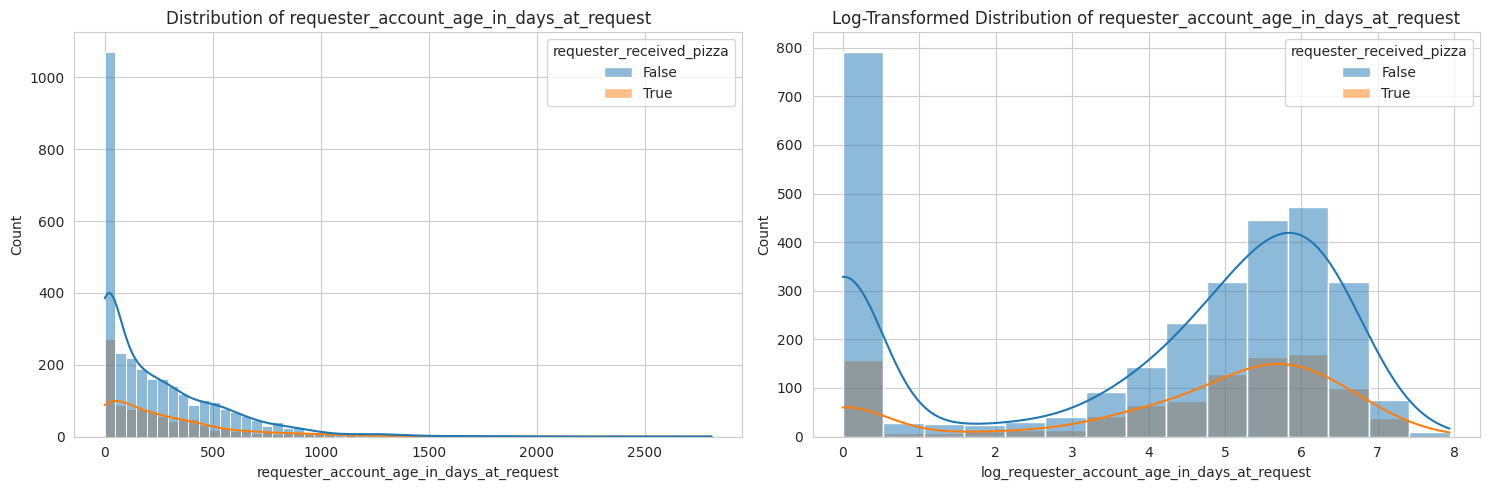

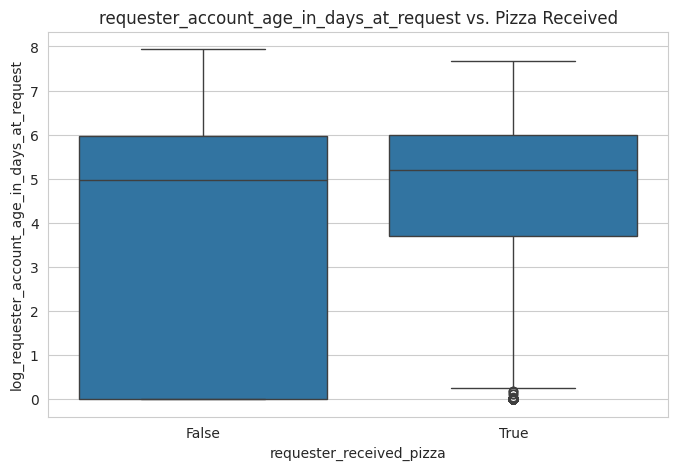

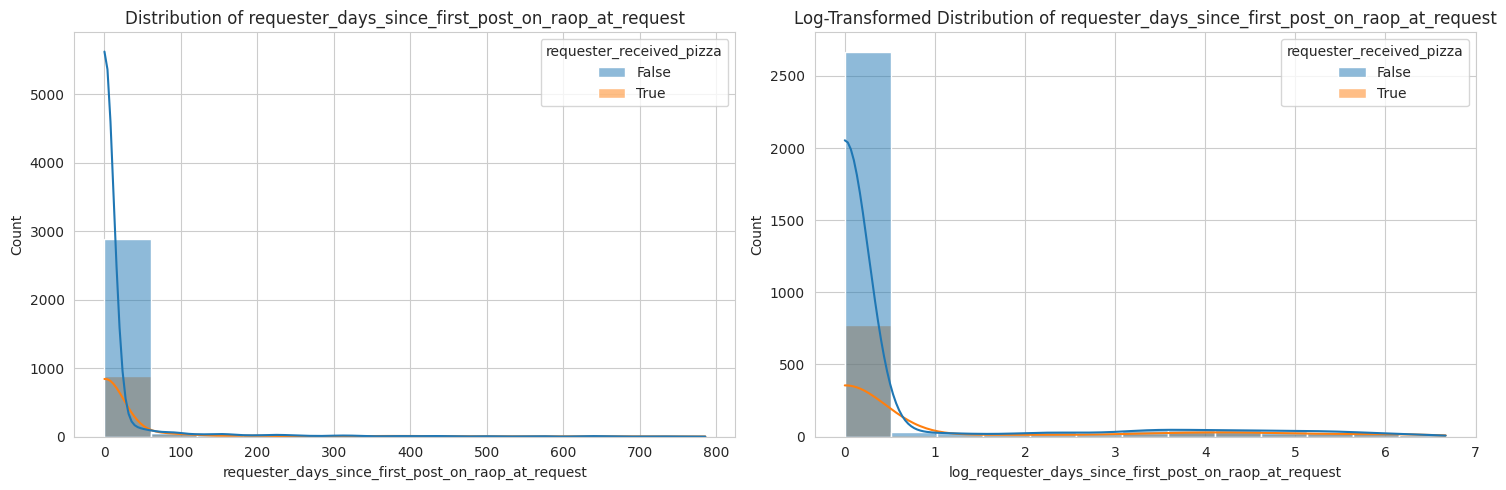

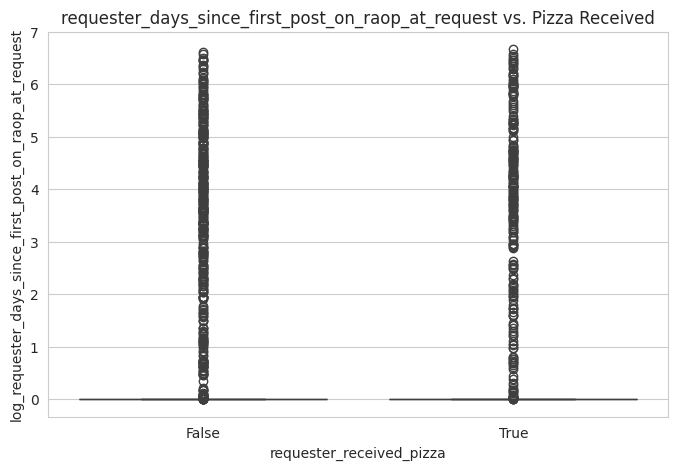

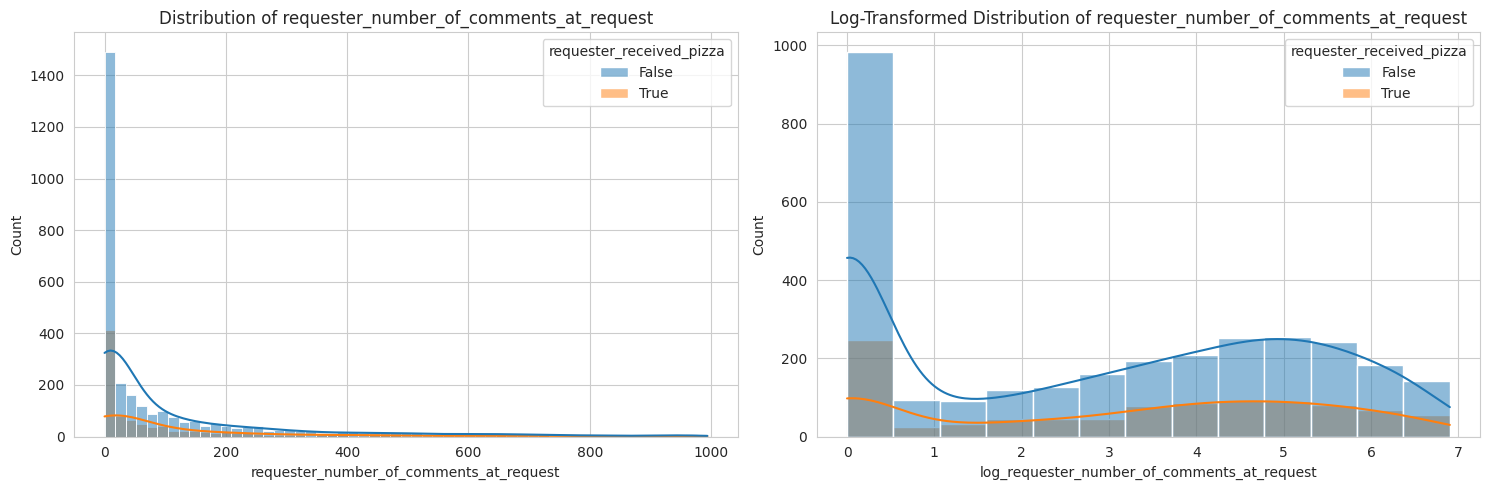

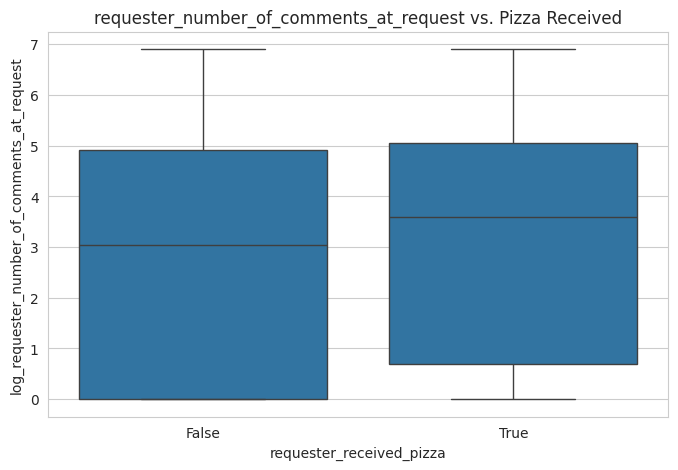

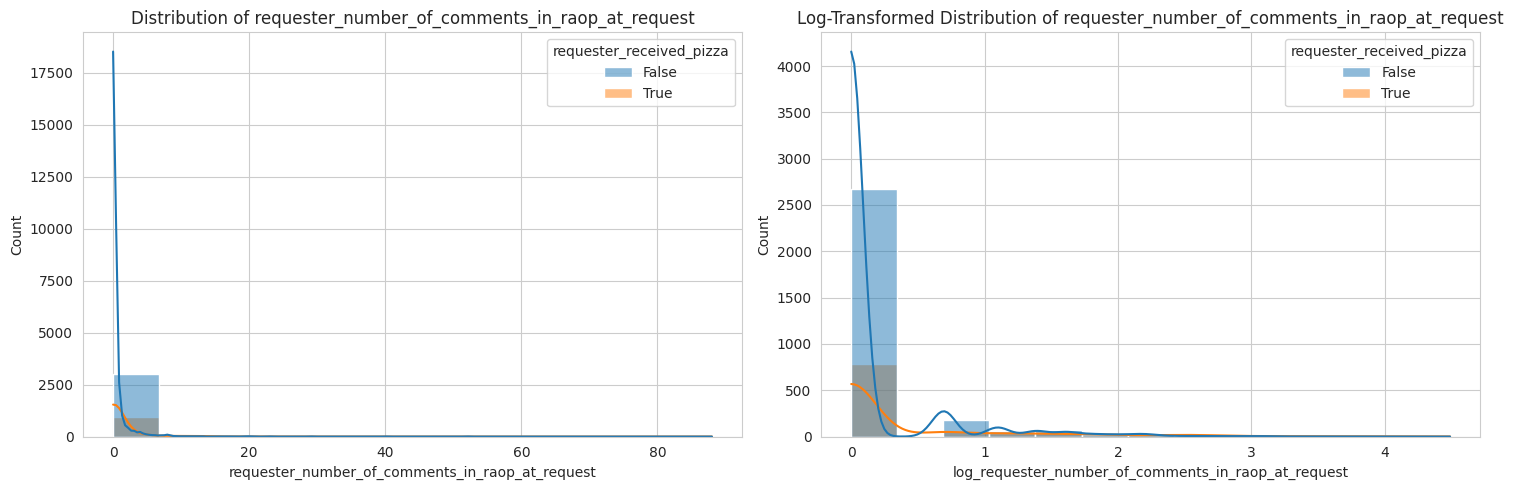

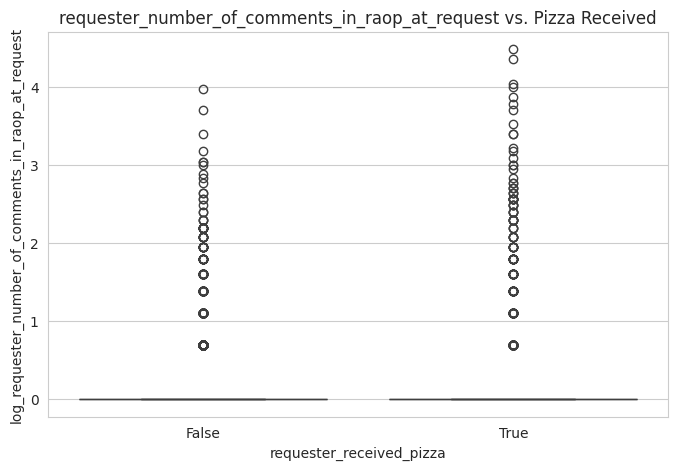

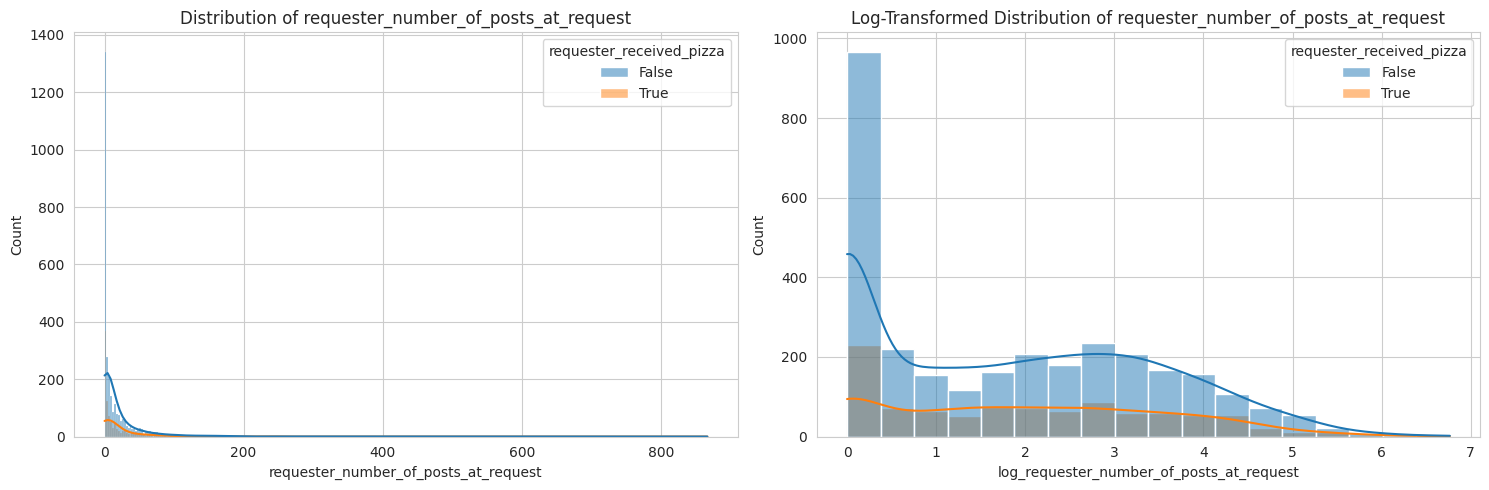

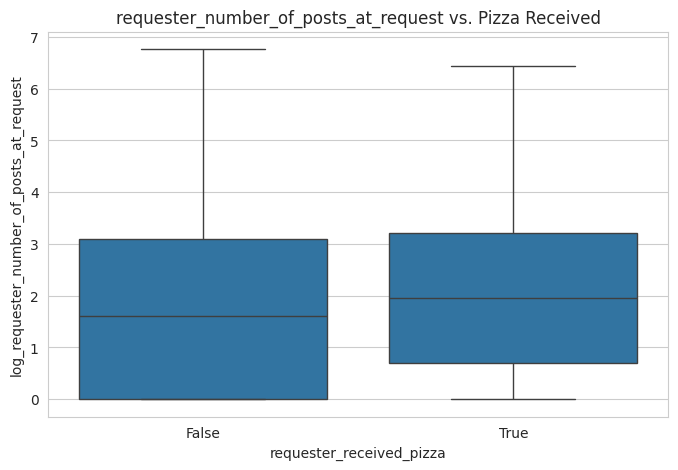

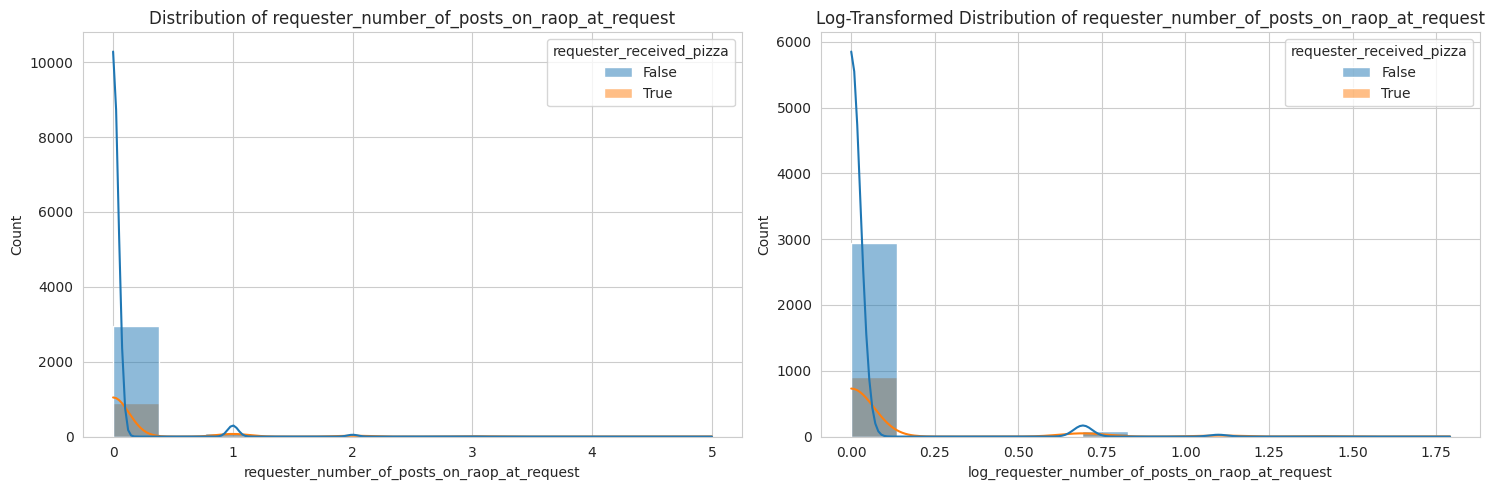

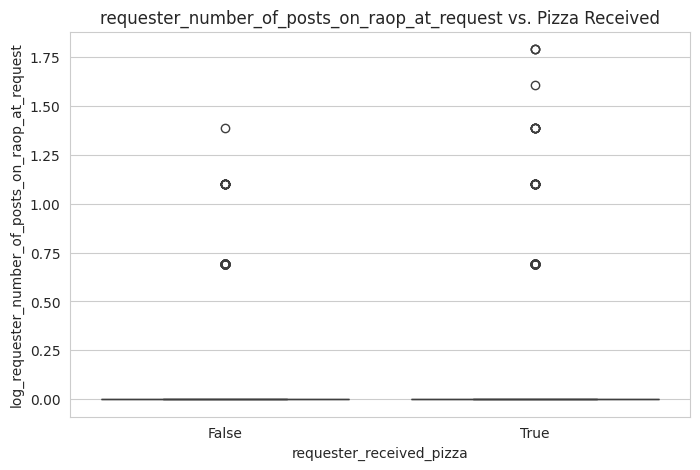

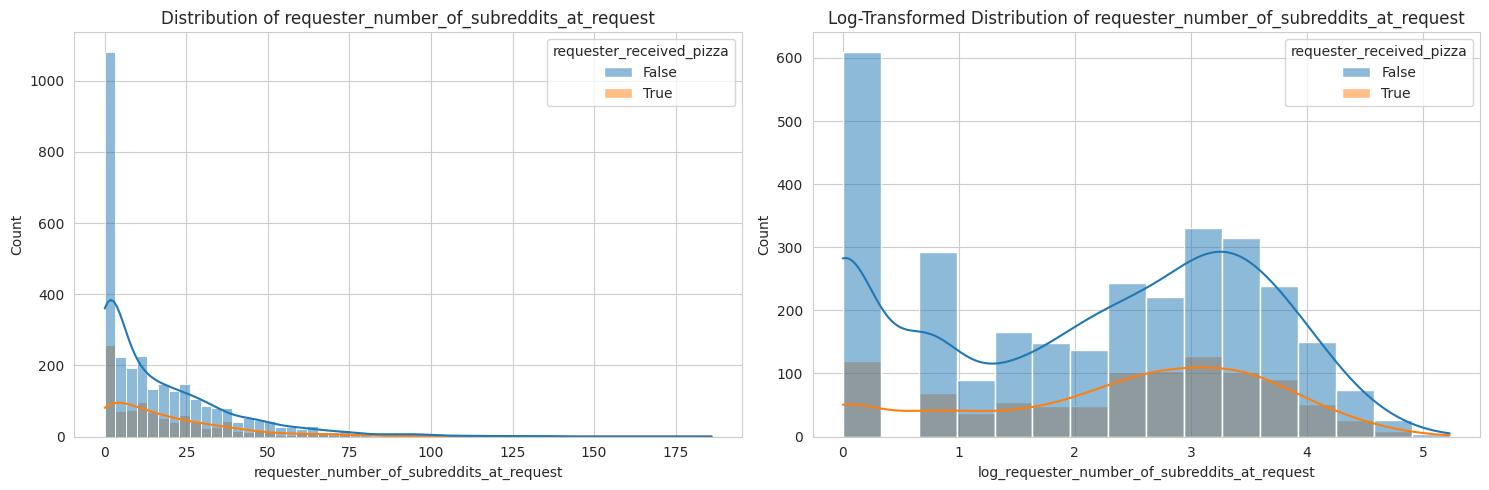

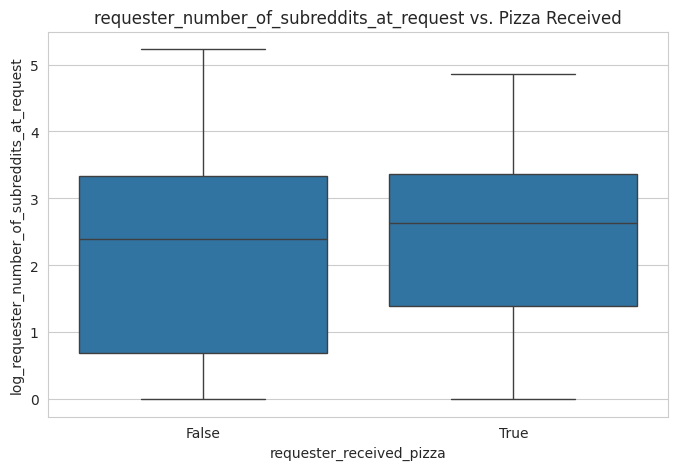

/home/gauthier/code/cybel_test/.cybel_env2/lib/python3.12/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/gauthier/code/cybel_test/.cybel_env2/lib/python3.12/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


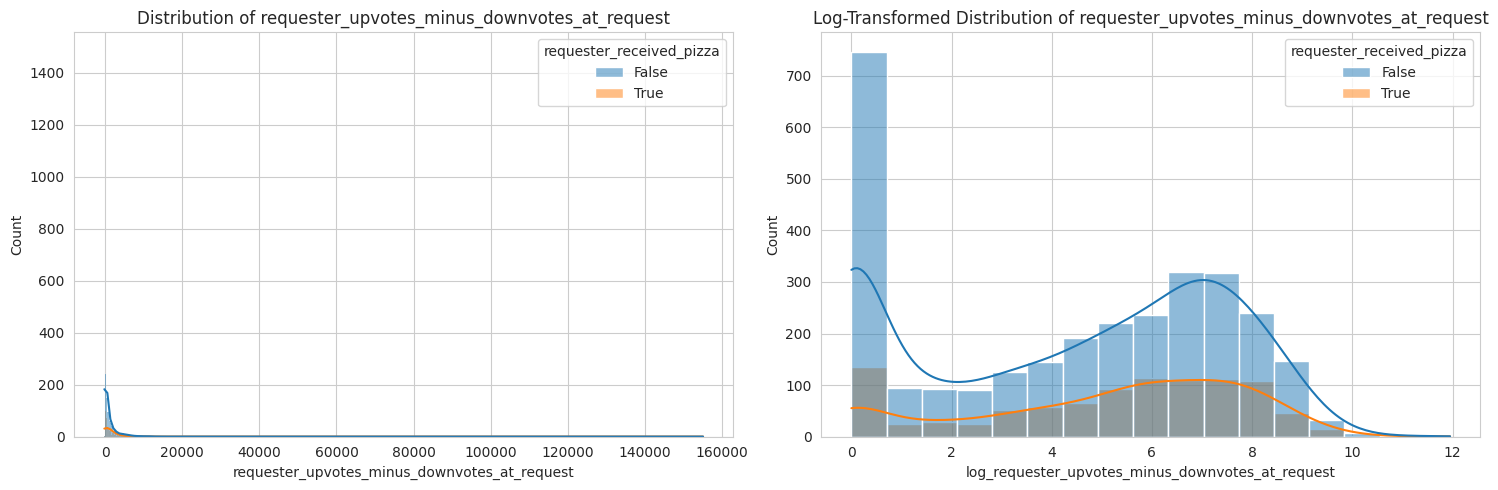

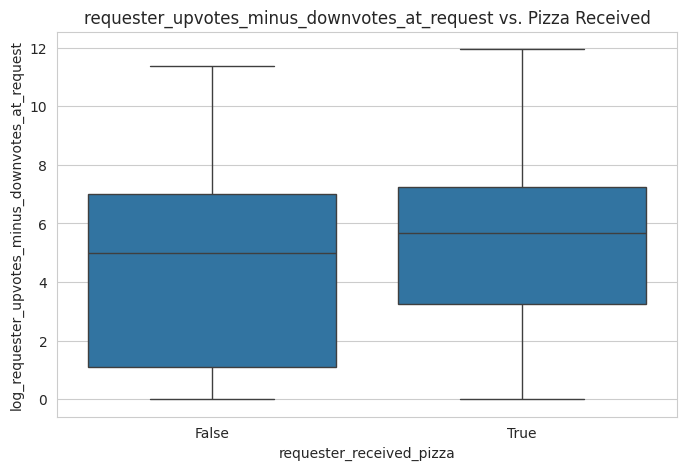

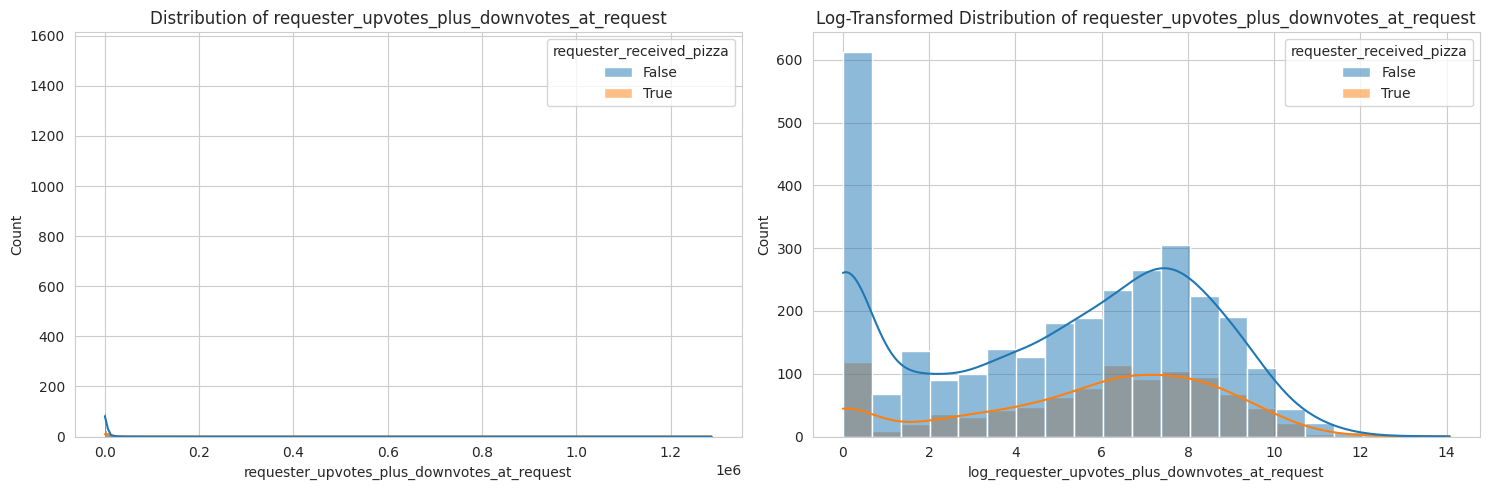

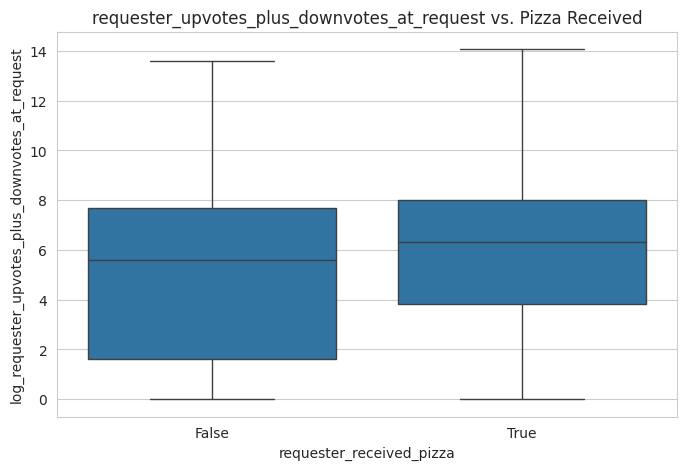

ValueError: Could not interpret value `raop_post_ratio` for `x`. An entry with this name does not appear in `data`.

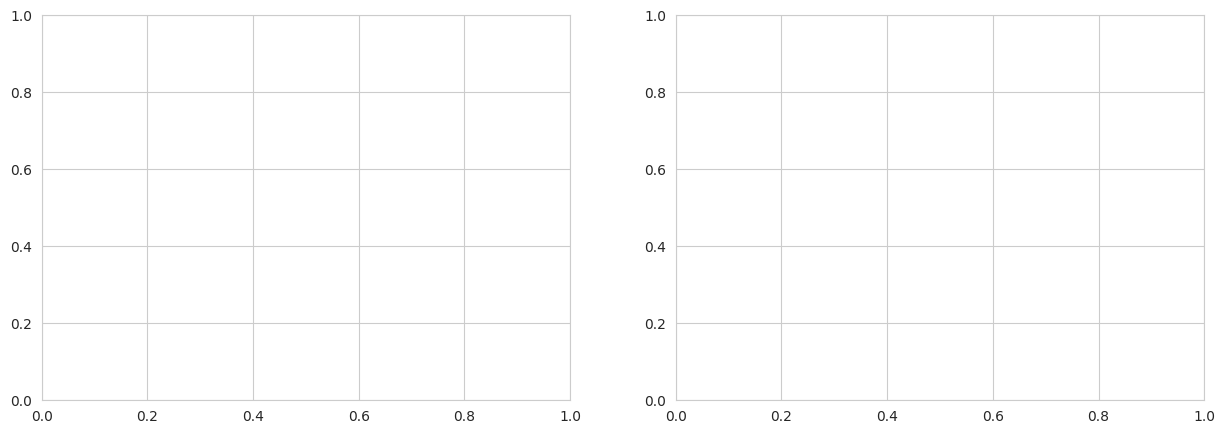

In [7]:

print("--- Analysis of User History & Activity Metrics ---")

# Most of these metrics are right-skewed. A log transform helps in visualization.
# We use np.log1p which calculates log(1 + x) to handle zeros.
for col in user_activity_cols:
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))

    # Plot 1: Distribution of the raw feature
    sns.histplot(df, x=col, hue=target_col, kde=True, ax=axes[0])
    axes[0].set_title(f"Distribution of {col}")

    # Plot 2: Distribution of the log-transformed feature
    # This helps visualize the heavily skewed data more clearly
    df[f"log_{col}"] = np.log1p(df[col])
    sns.histplot(df, x=f"log_{col}", hue=target_col, kde=True, ax=axes[1])
    axes[1].set_title(f"Log-Transformed Distribution of {col}")
    plt.tight_layout()
    plt.show()

    # Plot 3: Box plot to compare medians and quartiles
    plt.figure(figsize=(8, 5))
    sns.boxplot(data=df, x=target_col, y=f"log_{col}")
    plt.title(f"{col} vs. Pizza Received")
    plt.show()


--- Analysis of Request Content (Length) ---


ValueError: Could not interpret value `request_length` for `x`. An entry with this name does not appear in `data`.

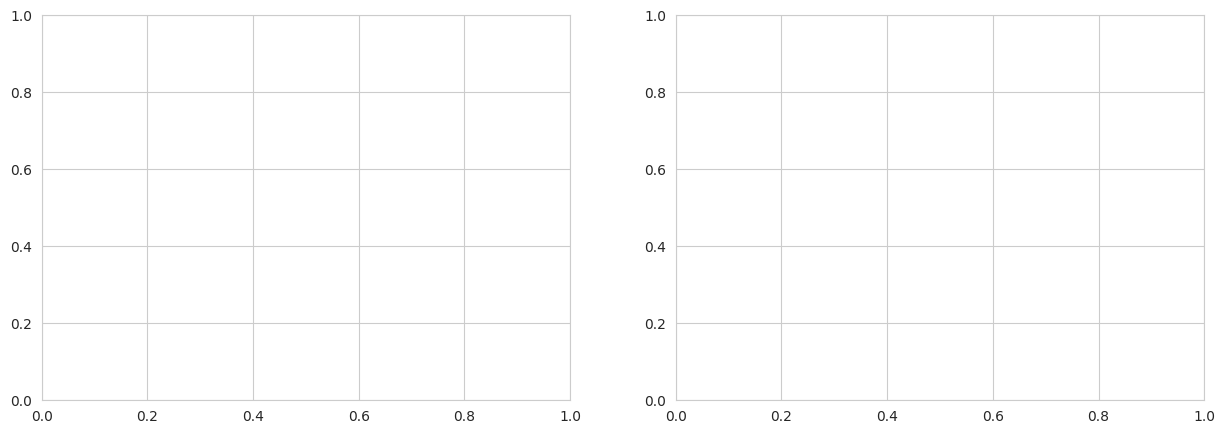

In [10]:
print("\n--- Analysis of Request Content (Length) ---")

# Plotting distribution and comparing with the target
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

sns.histplot(df, x="request_length", hue=target_col, kde=True, ax=axes[0])
axes[0].set_title("Distribution of Request Length")
axes[0].set_xlabel("Length of Request Text")

sns.boxplot(data=df, x=target_col, y="request_length")
axes[1].set_title("Request Length vs. Pizza Received")
axes[1].set_ylabel("Length of Request Text")
plt.show()
